In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
data = pd.read_csv(r'D:\Vamsi\Study\Sem 1\Machine Learning\MachineLearningProject\diamonds.csv', sep = ',')

In [7]:
data.shape

(53940, 10)

In [8]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335,4.34,4.35,2.75


In [10]:
data['carat'].isnull().sum()
data['cut'].isnull().sum()
data['color'].isnull().sum()
data['clarity'].isnull().sum()
data['depth'].isnull().sum()
data['table'].isnull().sum()
data['price'].isnull().sum()

0

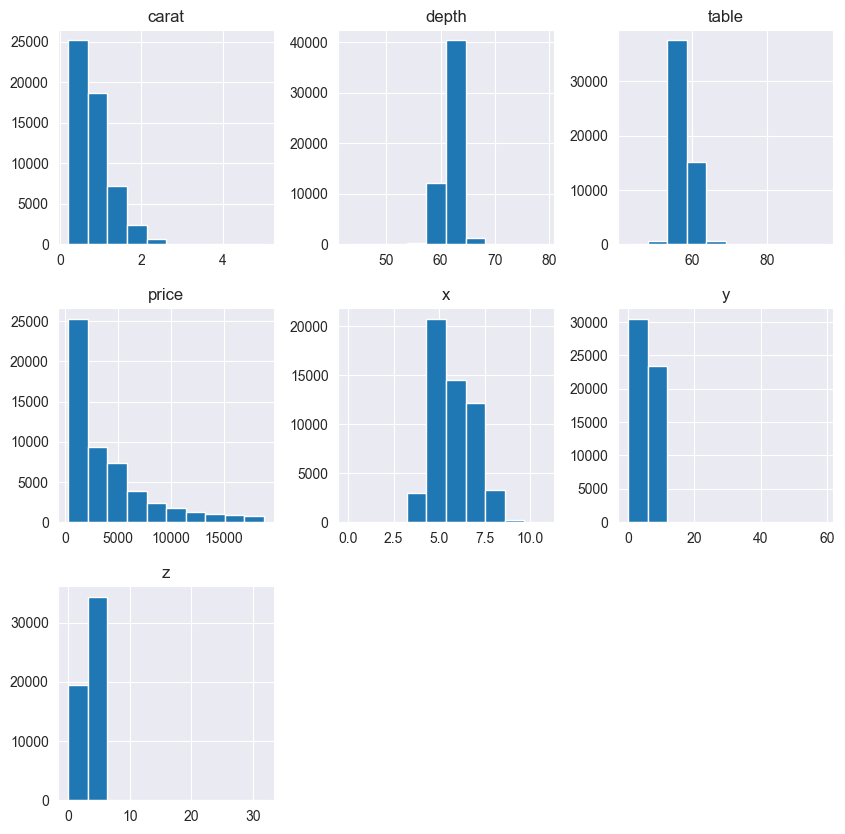

In [11]:
data.hist(figsize=(10,10), xrot=0)
plt.show()

In [12]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
data.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,b'Ideal',b'G',b'SI1'
freq,21551,11292,13065


In [14]:
data['price'].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

In [15]:
data['cut'].unique()

array(["b'Ideal'", "b'Premium'", "b'Good'", "b'Very Good'", "b'Fair'"],
      dtype=object)

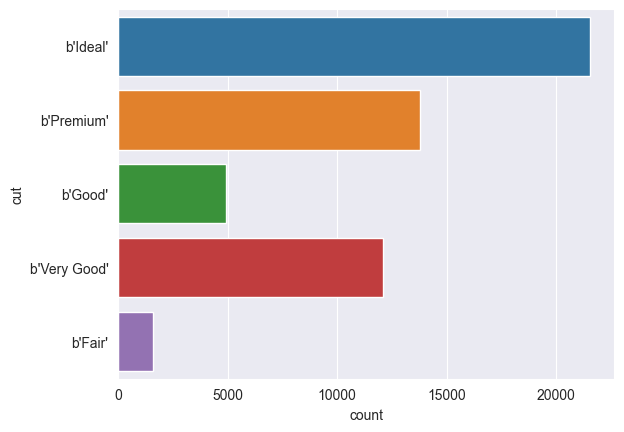

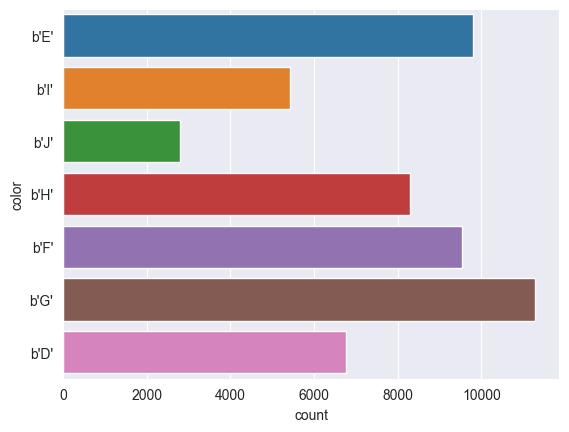

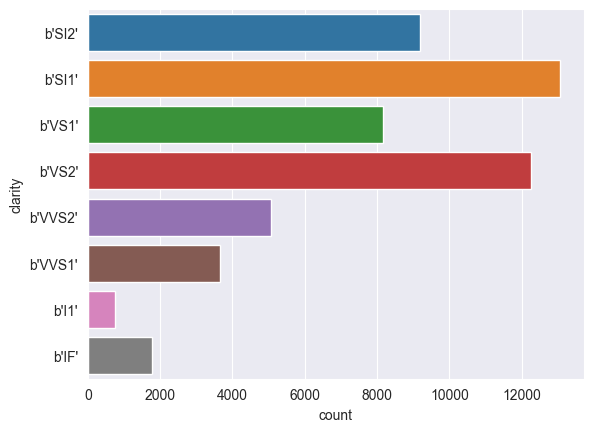

In [16]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 8:
        sns.countplot(y=col, data=data)
        plt.show()

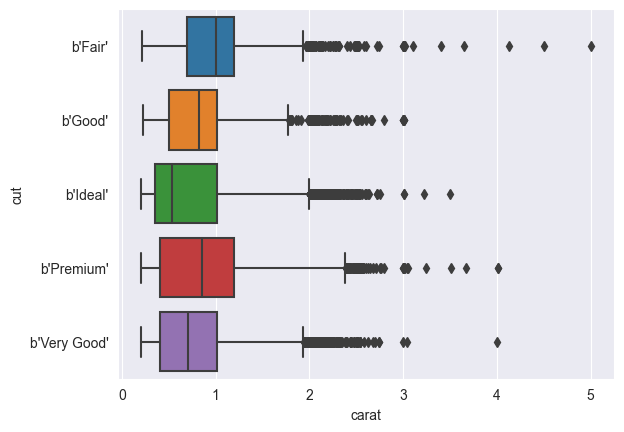

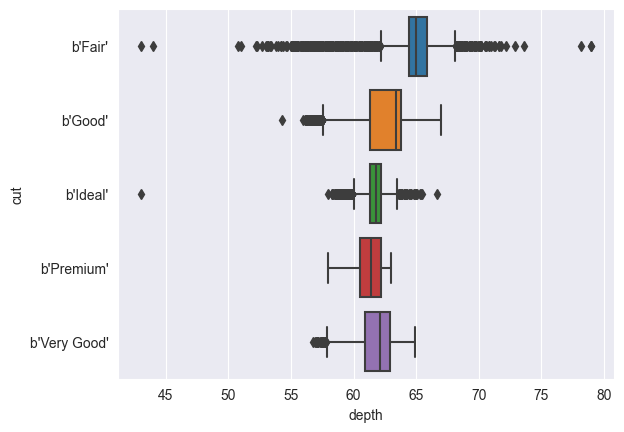

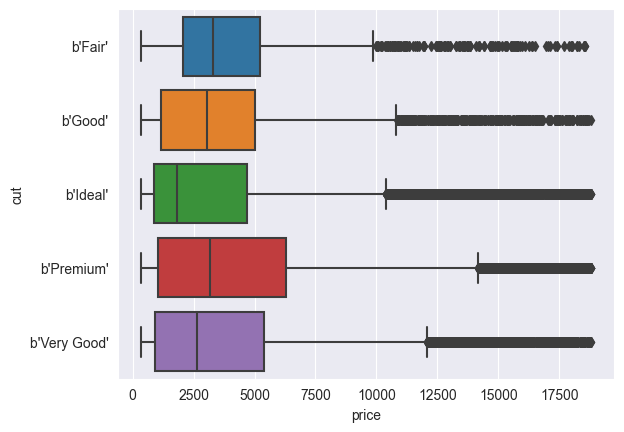

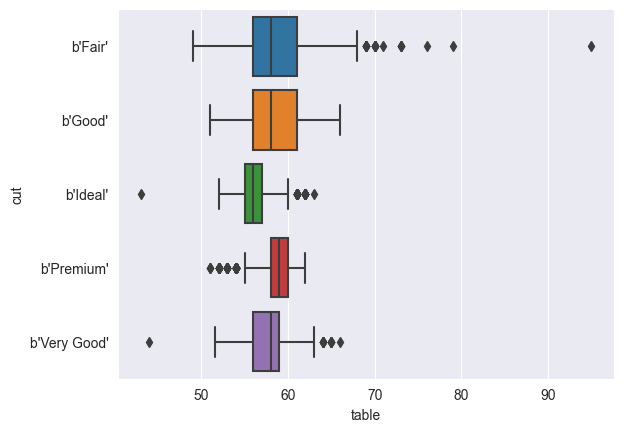

In [17]:
num_cols = ['carat','depth', 'price', 'table']
for col in num_cols:
    sns.boxplot(y = data['cut'].astype('category'), x = col, data=data)
    plt.show()

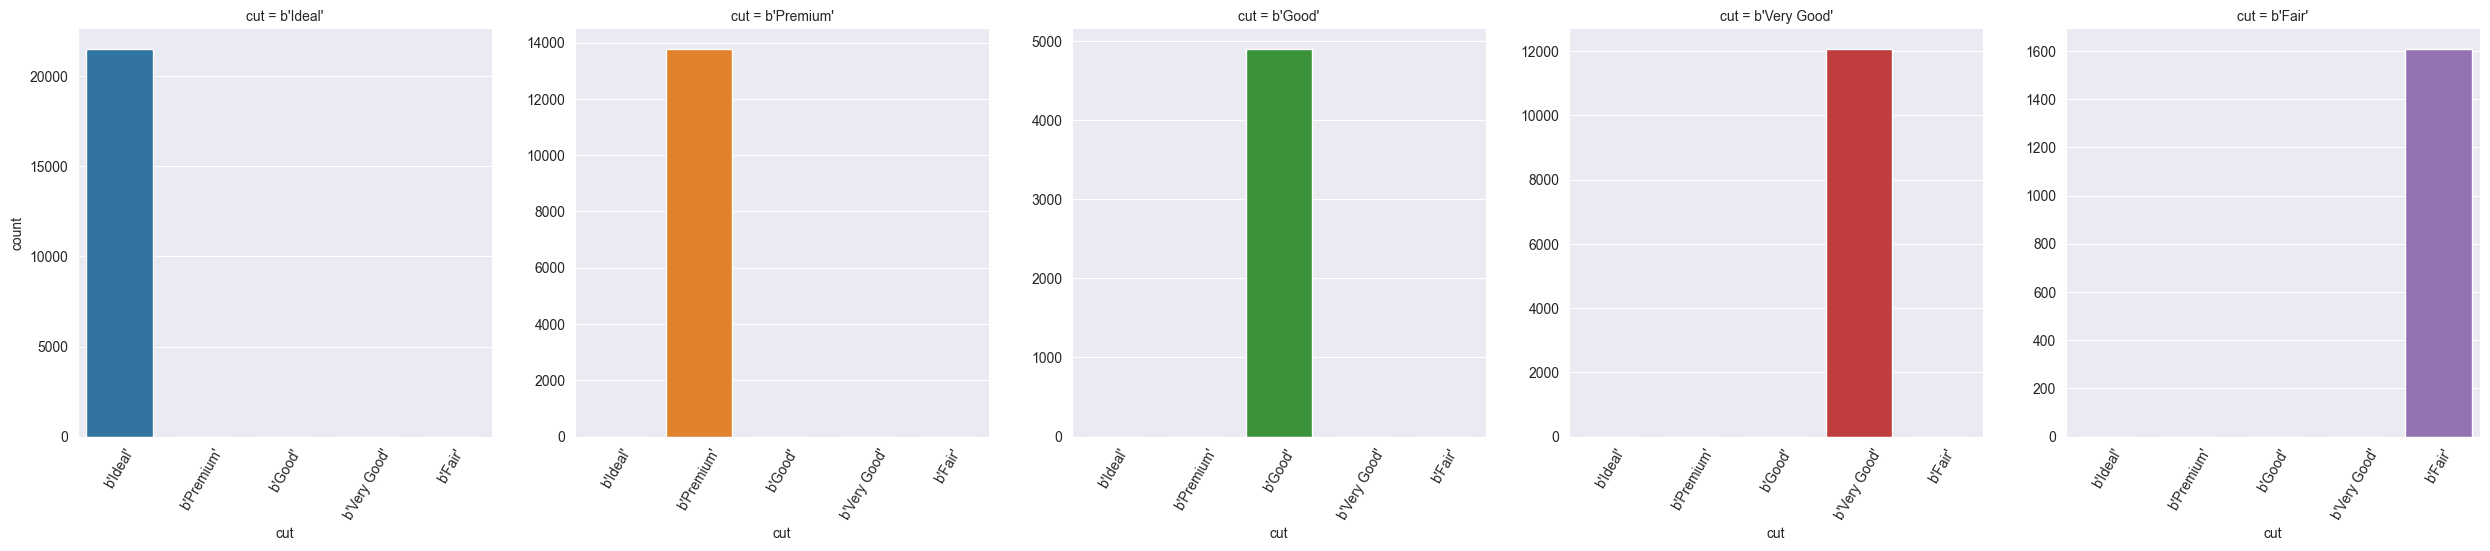

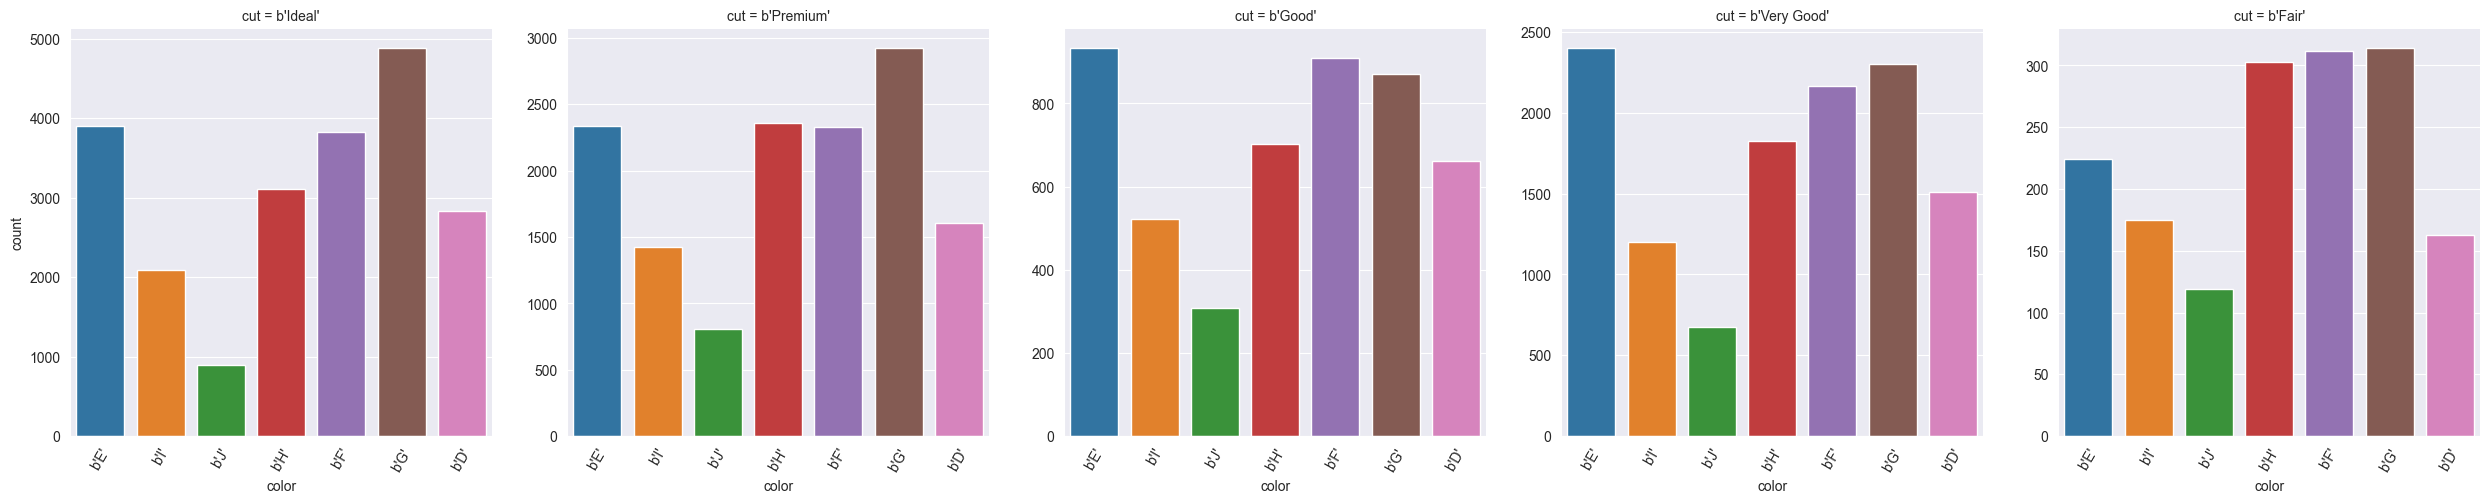

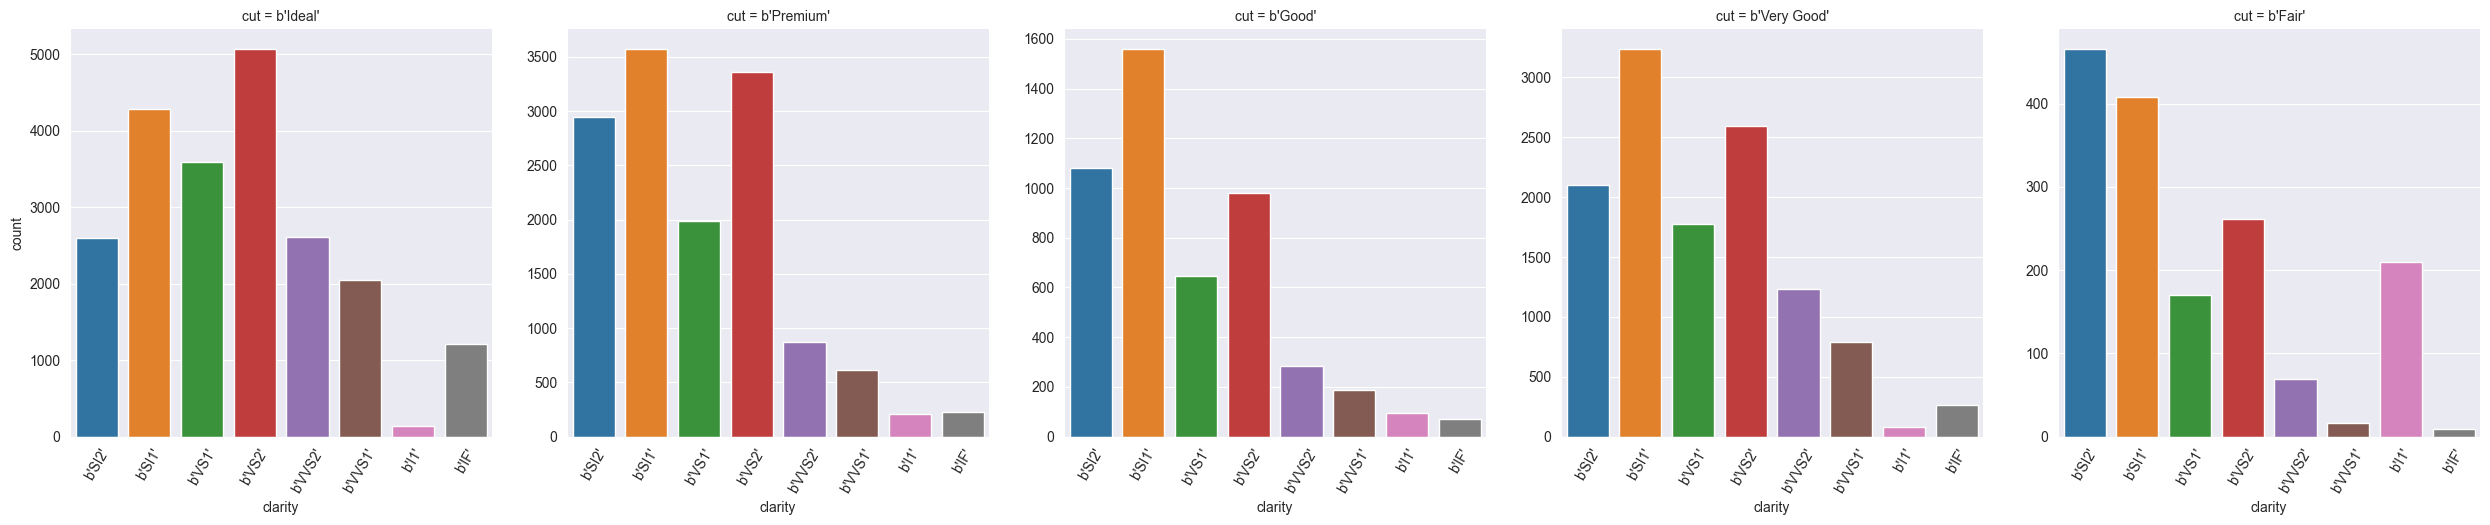

In [18]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 8:
        g = sns.catplot(x = col, kind='count', col = 'cut', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

In [19]:
corr = data.corr()
corr

C:\Users\nvams\AppData\Local\Temp\ipykernel_14852\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


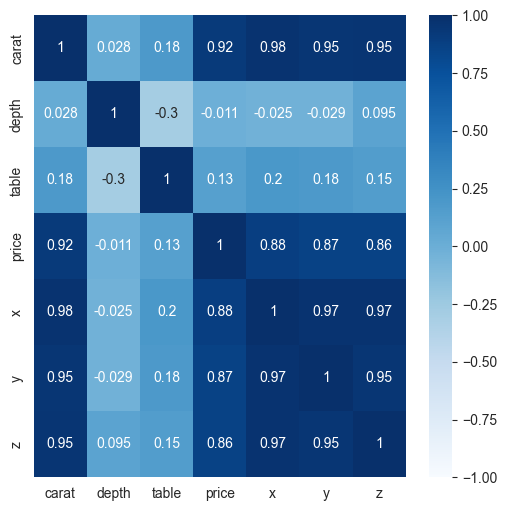

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='Blues', annot=True, vmax=1, vmin=-1)
plt.show()

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor 
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt

# to allow the plots to be displayed on the jupyter notebook
%matplotlib inline

def startKNN():
    le = LabelEncoder()
    data.cut = le.fit_transform(data.cut)
    data.color = le.fit_transform(data.color)
    data.clarity = le.fit_transform(data.clarity)
    x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values 
    y = data.iloc[:, 6].values
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) 
    
    mseValues = []
    rmseValues = []
    xValues = []
        
    for K in range(1, 8):
        K = K+1
        xValues.append(K)
        knnRegressor = KNeighborsRegressor(n_neighbors = K)

        knnRegressor.fit(X_train, y_train) 
        y_pred = knnRegressor.predict(X_test)
        mseError = mean_squared_error(y_test, y_pred)
        rmseError = sqrt(mean_squared_error(y_test, y_pred))
        mseValues.append(mseError)
        rmseValues.append(rmseError)
        
        print('\nMSE value for k =' , K , 'is :', mseError)
        print('RMSE value for k =' , K , 'is :', rmseError)
        print('R2-Score ',r2_score(y_test, y_pred))
        print('Model Score ',knnRegressor.score(X_test, y_test))
    
    defaultXTicks = range(len(xValues))
    
    #plotting the mse values against k values
    plt.plot(mseValues, label="MSE Error")
    plt.xticks(defaultXTicks, xValues)
    
    #plotting the rmse values against k values
    plt.plot(rmseValues, label="RMSE Error")
    plt.xticks(defaultXTicks, xValues)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('MSE & RMSE Error')
    plt.legend()
    
    print('\nThe best number of neighbors for the diamond dataset is ', rmseValues.index(min(rmseValues))+2)

These are the techniques for the project.
1.K Means Clustering
2.Fuzzy C Means Clustering
3.Linear Regression
4.K Nearest Neighbours

You have chosen K Nearest Neighbours !

MSE value for k = 2 is : 1.048271227289581
RMSE value for k = 2 is : 1.0238511743850183
R2-Score  0.999999936076923
Model Score  0.999999936076923

MSE value for k = 3 is : 0.9456082890454229
RMSE value for k = 3 is : 0.9724239245542157
R2-Score  0.9999999423372598
Model Score  0.9999999423372598

MSE value for k = 4 is : 0.9253452910641453
RMSE value for k = 4 is : 0.9619486946111758
R2-Score  0.9999999435728877
Model Score  0.9999999435728877

MSE value for k = 5 is : 0.9404597701149522
RMSE value for k = 5 is : 0.9697730508293949
R2-Score  0.999999942651214
Model Score  0.999999942651214

MSE value for k = 6 is : 0.939894636015331
RMSE value for k = 6 is : 0.9694816326343325
R2-Score  0.9999999426856756
Model Score  0.9999999426856756

MSE value for k = 7 is : 0.9746165429464483
RMSE value for k = 7 is : 0.98722

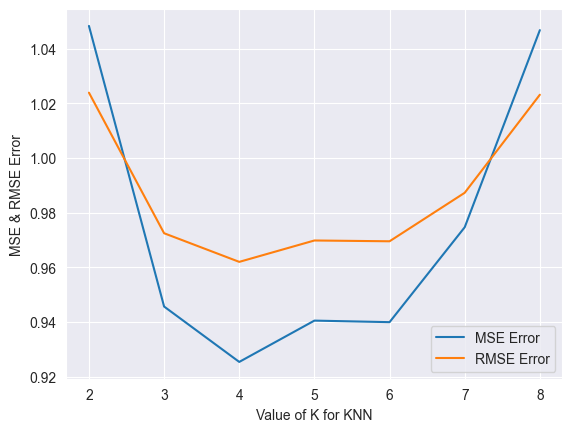

In [162]:
print('These are the techniques for the project.')
print('1.K Means Clustering')
print('2.Fuzzy C Means Clustering')
print('3.Linear Regression')
print('4.K Nearest Neighbours')

#choice = input('\nEnter your choice of the alogrithm and we will display your result :')
choice = '4'

match choice:
    case '1':
        print('\nYou have chosen K Means Clustering !')
    case '2':
        print('\nYou have chosen Fuzzy C Means Clustering !')
    case '3':
        print('\nYou have chosen Linear Regression !')
    case '4':
        print('\nYou have chosen K Nearest Neighbours !')
        startKNN()
    case _:
        print('\nYou have chosen an invalid option !')